In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy import stats
import pandas as pd
from scipy import fftpack
from matplotlib.colors import LogNorm

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

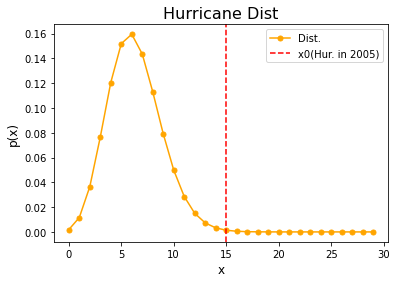

With the significance level 0.05, the rejection start at : 11  x0 : 15
P : 0.0008444930803583883
Based on the results, we reject the null hypothesis. Obverving 15 hurricanes in the year 2005 has a very low probability and the difference its difference between average value is too high.
Z score : 3.4661629670697414
P with Z score:  0.0005279431738299246
P is too low. We reject the null hypothesis in this scenario.


In [2]:
x0 = 15
mean = 6.3

x = np.arange(30)
y = stats.poisson.pmf(x, mean)

plt.ylabel("p(x)", size = 12)
plt.xlabel("x", size = 12)
plt.title("Hurricane Dist", size = 16)
plt.plot(x, y, marker = "o", label = "Dist.", color = "orange", markersize = 5)
plt.axvline(x0, c = 'red', label = 'x0(Hur. in 2005)', ls = '--')
plt.legend()
plt.show()

sig_level = 0.05
reject_point = x[y.cumsum() < 1 - sig_level][-1] + 1
print("With the significance level 0.05, the rejection start at :", reject_point, " x0 :", x0)

p_value = 1 - stats.poisson.cdf(x0, mean)
print("P :", p_value)

print("Based on the results, we reject the null hypothesis. Obverving 15 hurricanes in the year 2005 has a very low probability and the difference its difference between average value is too high.")

sigma = np.sqrt(mean)
z = abs(x0 - mean) / sigma
print("Z score :", z)

p_value_new = stats.norm.cdf(-z) + (1 - stats.norm.cdf(z))
print("P with Z score: ", p_value_new)
print("P is too low. We reject the null hypothesis in this scenario.")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)

sigma1 = np.sqrt(np.var(pre, ddof= 1))
sigma2 = np.sqrt(np.var(post, ddof= 1))
sigma = np.sqrt((sigma1**2 + sigma2**2) / 2)

T = (np.mean(pre) - np.mean(post)) / (sigma * np.sqrt(2 / n))
print("T :", T)

p_value = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("P :", p_value)
print("P value is less than 0.05. We reject the null hypothesis. The change in the blood pressure is significant.")

T : -3.786997938137629
P : 0.004302464132864604
P value is less than 0.05. We reject the null hypothesis. The change in the blood pressure is significant.


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

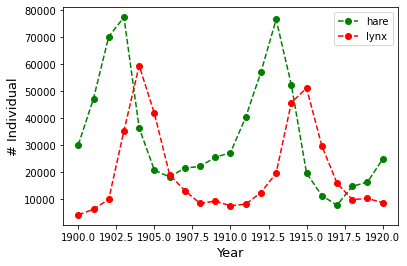

In [4]:
from scipy import fftpack
data = pd.read_csv("populations.txt", delimiter = "\t")
hare = np.array(data["hare"])
lynx = np.array(data["lynx"])
year = np.array(data["# year"])

plt.plot(year, hare, marker = "o", color = "green", linestyle = "--", label = "hare")
plt.plot(year, lynx, marker = "o", color = "red", linestyle = "--", label = "lynx")
plt.xlabel('Year', size = 13)
plt.ylabel('# Individual', size = 13)
plt.legend()
plt.show()

In [5]:
# FFT
fft_h = fftpack.fft(hare)
fft_l = fftpack.fft(lynx)

# Power
power_h = np.abs(fft_h)
power_l = np.abs(fft_l)

# freq 
freq = fftpack.fftfreq(len(year), d = 1) 

p_mask = np.where(freq > 0)
freqs = freq[p_mask]
powers = power_h[p_mask]

hare_T  = 1 / freqs[np.argmax(powers)]
lynx_T = 1 / freqs[np.argmax(powers)]

print("T of Hare :", hare_T)
print("T of Lynx :", lynx_T)

T of Hare : 10.5
T of Lynx : 10.5


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

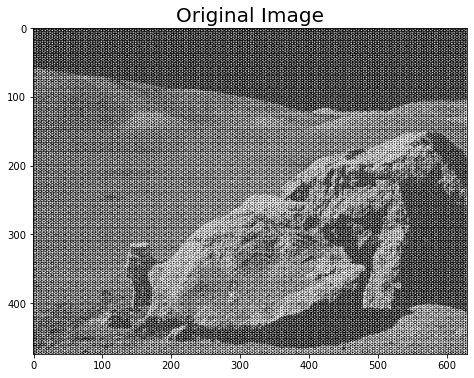

In [6]:
image = plt.imread('moonlanding.png')
fig, ax = plt.subplots(figsize=(12, 6))
plt.imshow(image, cmap = "gray")
plt.title('Original Image', size = 20)
plt.show()

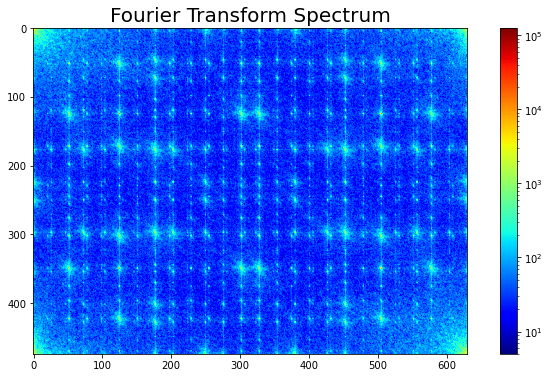

In [7]:
fft_image = fftpack.fft2(image)
fig, ax = plt.subplots(figsize=(12, 6))
plt.imshow(np.abs(fft_image), norm = LogNorm(vmin = 5), cmap = "jet")
plt.title('Fourier Transform Spectrum', size = 20)
plt.colorbar()
plt.show()

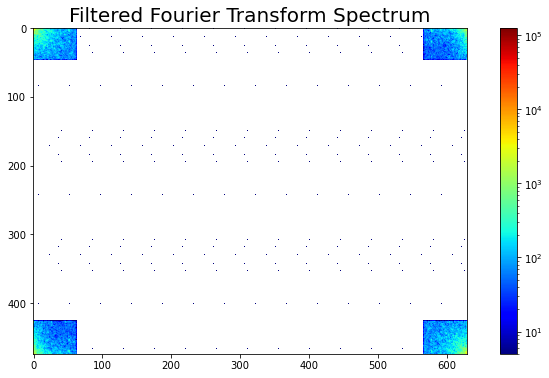

In [8]:
frac = 0.1
r, c = fft_image.shape

# Setting values to zero
fft_image[int(r * frac): int(r * (1 - frac))] = 0 # for rows
fft_image[:, int(c * frac): int(c * (1 - frac))] = 0 # for columns

fig, ax = plt.subplots(figsize=(12, 6))
plt.imshow(np.abs(fft_image), norm = LogNorm(vmin = 5), cmap = "jet")
plt.title('Filtered Fourier Transform Spectrum', size = 20)
plt.colorbar()
plt.show()

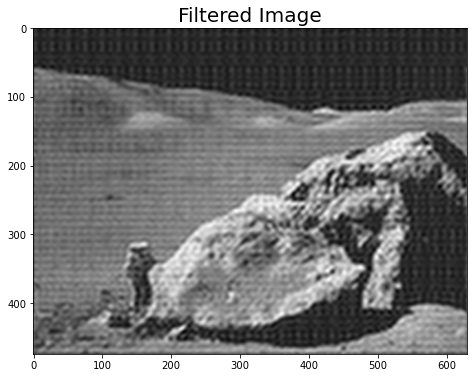

In [9]:
# Discard imaginery part
filtered = fftpack.ifft2(fft_image).real
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Filtered Image', size = 20)
plt.imshow(filtered, plt.cm.gray)
plt.show()